# REINFORCE

---

In this notebook, we will train REINFORCE with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
torch.manual_seed(0) # set random seed
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [36]:
### 2. Define the Architecture of the Policy

observation space: Box(4,)
action space: Discrete(2)


### 3. Train the Agent with REINFORCE

In [39]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)

def reinforce(n_episodes=10000, max_t=2000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])
        
        policy_loss = []
        for log_prob in saved_log_probs:
            policy_loss.append(-log_prob * R)
        policy_loss = torch.cat(policy_loss).sum()
        
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores
    
scores = reinforce()

Episode 100	Average Score: 27.22
Episode 200	Average Score: 41.50
Episode 300	Average Score: 55.19
Episode 400	Average Score: 43.40
Episode 500	Average Score: 55.51
Episode 600	Average Score: 88.58
Episode 700	Average Score: 113.18
Episode 800	Average Score: 128.14
Episode 900	Average Score: 147.40
Episode 1000	Average Score: 109.23
Episode 1100	Average Score: 144.13
Episode 1200	Average Score: 111.79
Episode 1300	Average Score: 123.53
Episode 1400	Average Score: 139.90
Episode 1500	Average Score: 122.63
Episode 1600	Average Score: 131.84
Episode 1700	Average Score: 105.06
Episode 1800	Average Score: 139.62
Episode 1900	Average Score: 173.64
Episode 2000	Average Score: 166.78
Episode 2100	Average Score: 93.85
Episode 2200	Average Score: 167.28
Episode 2300	Average Score: 186.02
Episode 2400	Average Score: 189.12
Episode 2500	Average Score: 188.31
Environment solved in 2472 episodes!	Average Score: 195.27


### 4. Plot the Scores

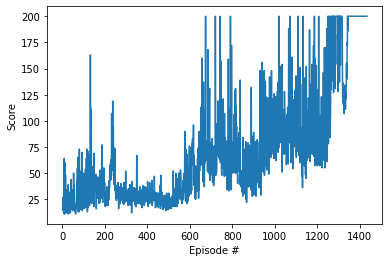

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [5]:
env = gym.make('CartPole-v0')

state = env.reset()
for t in range(1000):
    action, _ = policy.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()